<a href="https://colab.research.google.com/github/Janaalsh5/Heart-Disease/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# **Project Goal:**

The primary objective of this project is to develop innovative predictive techniques that not only classify patients based on their risk of heart disease using multiple medical indicators but also employ clustering techniques to uncover distinct patient profiles. By integrating these approaches, the project aims to provide healthcare professionals with actionable insights that enhance early detection and personalized prevention strategies, ultimately contributing to improved cardiovascular health outcomes.

# **Dataset Source:**

The dataset was obtained from kaggle.com
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

In [ ]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
sns.set_palette(["#ffb6c1", "#ff69b4"])
df = pd.read_csv("/content/heart.csv")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

# **Dataset Description**

***Features:***
Number and data types of attirbutes


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


***Number of Objects:***
Based on the dataset there are 918 rows and 12 columns.

In [ ]:
print(f"- Rows (instances): {df.shape[0]}")
print(f"- Columns (features): {df.shape[1]}")

- Rows (instances): 918
- Columns (features): 12


***Class Distribution:***
From our class label (heart disease) there are 410 patients with no heart disease and 508 patients with heart disease.


In [ ]:
print("Target Column (class attribute): HeartDisease")
count_0 = df[df["HeartDisease"] == 0].shape[0]
count_1 = df[df["HeartDisease"] == 1].shape[0]
print(f"- Patients with NO heart disease (0): {count_0}")
print(f"- Patients WITH heart disease (1): {count_1}")


Target Column (class attribute): HeartDisease
- Patients with NO heart disease (0): 410
- Patients WITH heart disease (1): 508


***Dataset Sample:***
sample of the raw dataset.

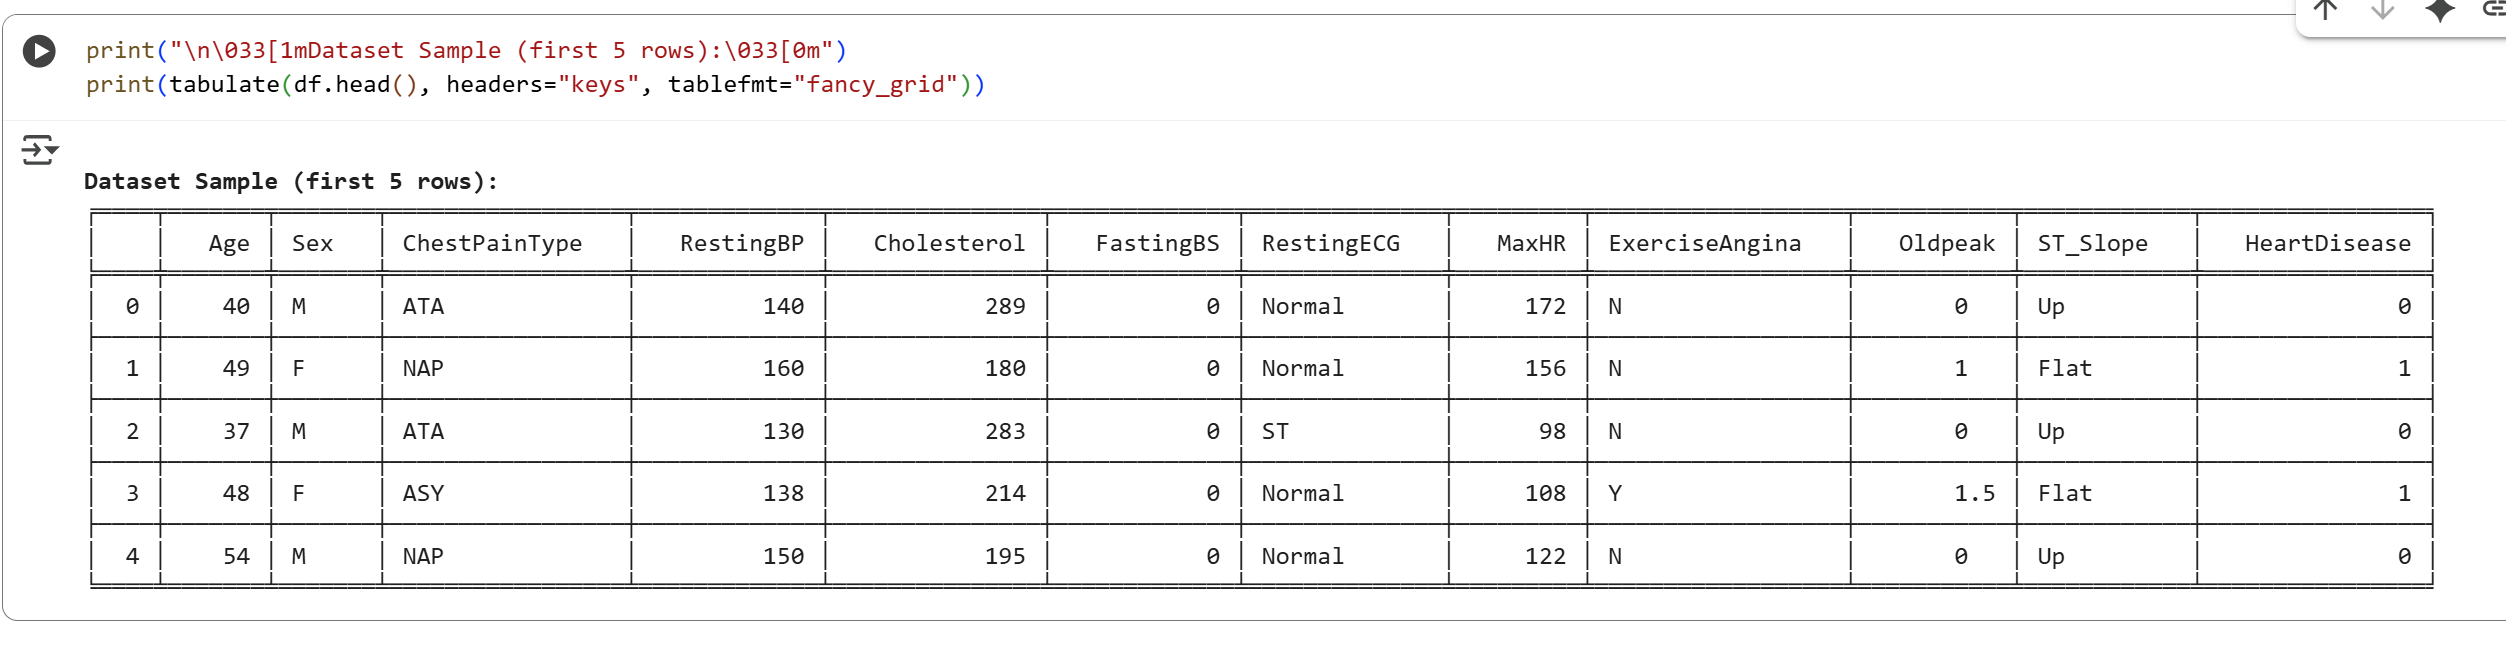

In [ ]:
from IPython.display import Image, display

display(Image("/content/dataset.png"))

*We displayed the table as a photo for a better represntaiton*

In [ ]:
print("\n\033[1mDataset Sample (first 5 rows):\033[0m")
print(tabulate(df.head(), headers="keys", tablefmt="fancy_grid"))


Dataset Sample (first 5 rows):
╒════╤═══════╤═══════╤═════════════════╤═════════════╤═══════════════╤═════════════╤══════════════╤═════════╤══════════════════╤═══════════╤════════════╤════════════════╕
│    │   Age │ Sex   │ ChestPainType   │   RestingBP │   Cholesterol │   FastingBS │ RestingECG   │   MaxHR │ ExerciseAngina   │   Oldpeak │ ST_Slope   │   HeartDisease │
╞════╪═══════╪═══════╪═════════════════╪═════════════╪═══════════════╪═════════════╪══════════════╪═════════╪══════════════════╪═══════════╪════════════╪════════════════╡
│  0 │    40 │ M     │ ATA             │         140 │           289 │           0 │ Normal       │     172 │ N                │       0   │ Up         │              0 │
├────┼───────┼───────┼─────────────────┼─────────────┼───────────────┼─────────────┼──────────────┼─────────┼──────────────────┼───────────┼────────────┼────────────────┤
│  1 │    49 │ F     │ NAP             │         160 │           180 │           0 │ Normal       │     156 │ N  

# Phase 2:

# **Q1-Data Analysis**

**Statistic summery:**

In [ ]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Age:** Patients’ ages range from 28 to 77, with a median of 54 and a mean of 53.5, indicating a middle-aged population. Most patients are in the middle-aged to elderly range, as 50% of the patients are aged 54 or older, while 25% are younger than 47.

**RestingBP:** The values have a mean of 132.4 and a median of 130. The interquartile range is 120 to 140, showing that most patients have normal blood pressure levels. However, a minimum value of 0 suggests data errors, which will be handled later.

**Cholesterol:** The majority of patients (IQR: 173 to 267) fall within normal (<200) to borderline high (>240) cholesterol levels. However, a minimum value of 0 suggests data errors, which will be handled later.

**FastingBS:** Most patients (76.7%) have normal fasting blood sugar levels (0), while a small portion (23.3%) have elevated levels (1).

**MaxHR:** Maximum heart rates vary between 60 and 202, with a median of 138, indicating diverse cardiovascular performance.

**Oldpeak:** The IQR (0 to 1.5) means most patients experience mild to moderate ST depression during exercise, which is a common indicator of ischemia (reduced blood flow due to a blockage or narrowing of blood vessels) or heart disease.

**HeartDisease:** The target variable indicates that 55.3% of patients have heart disease, while 44.7% do not, showing a relatively balanced distribution with a slight majority having heart disease.

# **Outlier:**

In [ ]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
RestingBP: 28 outliers
Cholesterol: 183 outliers
FastingBS: 214 outliers
MaxHR: 2 outliers
Oldpeak: 16 outliers
HeartDisease: 0 outliers


# **Various Plots**

**Boxplot: Age by Heart Disease**

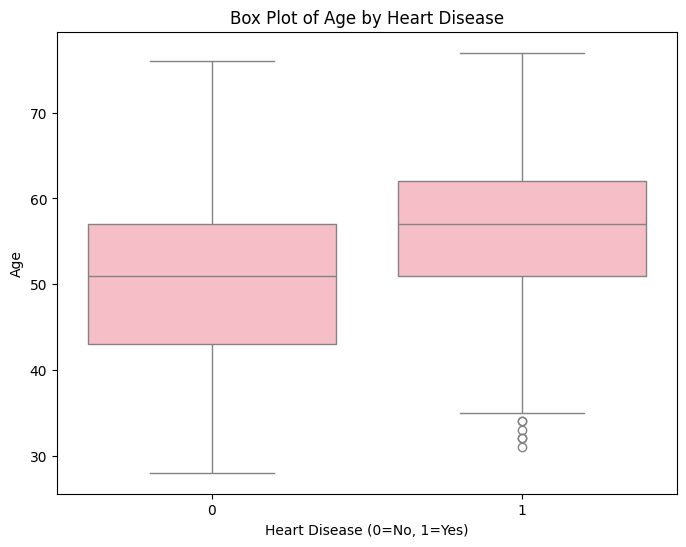

In [ ]:

plt.figure(figsize=(8,6))
sns.boxplot(x="HeartDisease", y="Age", data=df)
plt.title("Box Plot of Age by Heart Disease")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()


**Box Plots:** Box plots were created for all numeric attributes, separated by heart disease status (0 = No, 1 = Yes). They revealed outliers in features such as cholesterol and age, as well as differences in median values between patients with and without heart disease. These insights indicate that outlier handling and scaling or normalization may be necessary before modeling.

**Scatter Plot: Age vs MaxHR**

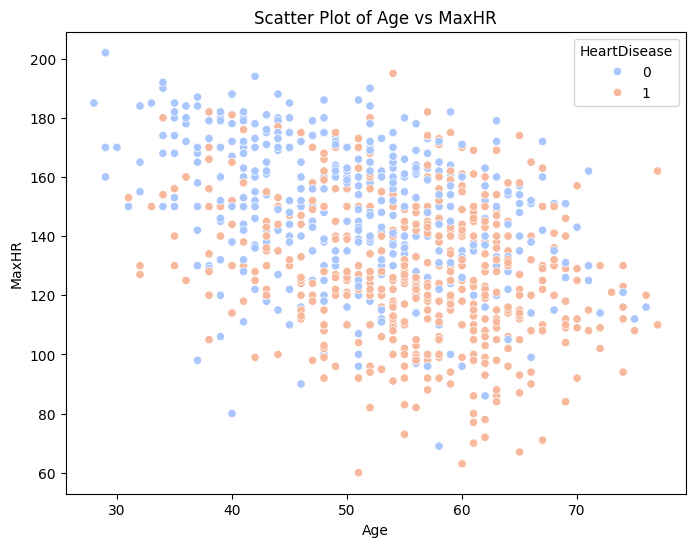

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="MaxHR", hue="HeartDisease", data=df, palette="coolwarm")
plt.title("Scatter Plot of Age vs MaxHR")
plt.show()


**Scatter Matrix:** The scatter matrix plotted pairwise relationships between numeric features, showing correlations, clusters, and unusual bivariate patterns. Some strong correlations suggest that feature selection may be beneficial, while outliers and extreme combinations highlight the need for data cleaning or transformation.

**Histogram: Cholesterol distribution**


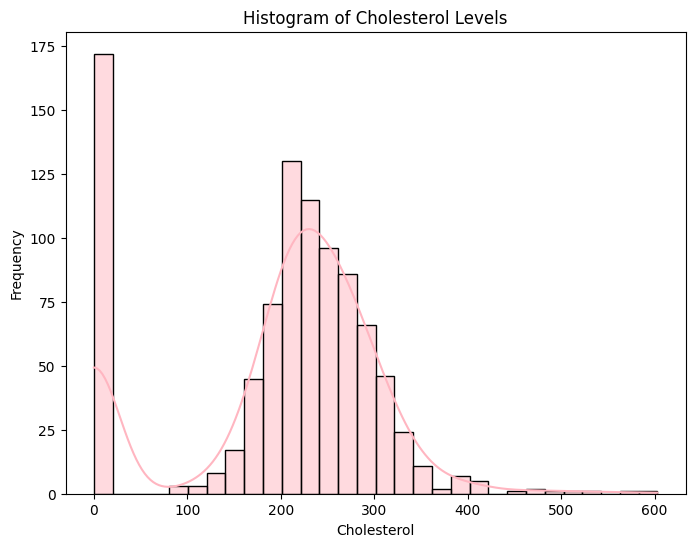

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df["Cholesterol"], bins=30, kde=True)
plt.title("Histogram of Cholesterol Levels")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()

**Histograms:** Histograms of numeric attributes showed the frequency distributions of each feature. Several attributes exhibited skewed distributions, and some extreme values were apparent. This suggests that transformations such as log or min-max scaling, as well as imputation for any unusual or missing values, may be needed during preprocessing.

**Bar Plot: Chest Pain Type vs Heart Disease**

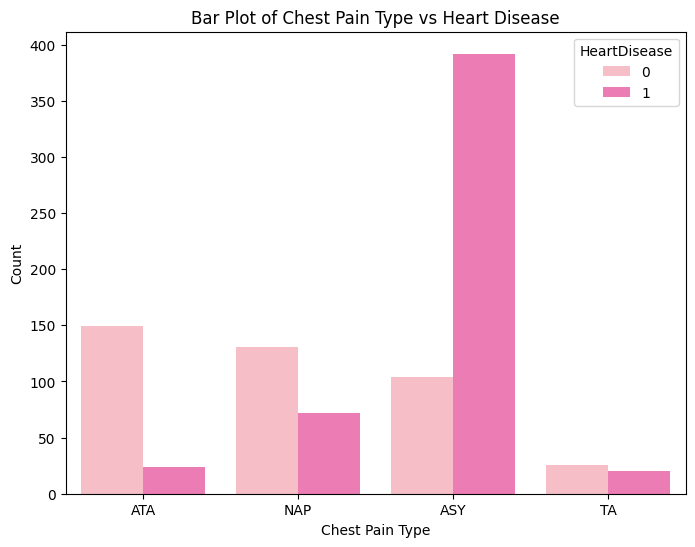

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="ChestPainType", hue="HeartDisease", data=df)
plt.title("Bar Plot of Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

**Bar Plots:** Bar plots of categorical attributes against heart disease status revealed imbalanced categories and differences in distribution between patients with and without heart disease. These observations indicate that categorical features will need proper encoding, and rare categories may require grouping or removal. Class imbalance may also need to be addressed with resampling techniques.

# **Varaince:**


In [ ]:
data = pd.read_csv('heart.csv')
variance= data.var(numeric_only=True);
print(variance);

Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64


**Key Findings from the Variance Analysis**

**Age (88.97):** The moderate variance aligns with the broad age span of patients (28–77 years), showing that the dataset captures a good mix of age groups.

**RestingBP (342.77):** Blood pressure values vary greatly across patients, which likely reflects differences in underlying health. The unusual zero entry may also be contributing to the higher variance.

**Cholesterol (11,964.89):** The variance is very large, driven by both outlier values (0) and the wide measurement range (0–603). This indicates strong inconsistency in cholesterol levels.

**FastingBS (0.18):** With such a small variance, it’s clear that most patients fall into the same category (normal blood sugar = 0), making the distribution highly skewed.

**MaxHR (648.23):** The substantial variance shows that maximum heart rate differs widely among patients, hinting at varying fitness or cardiovascular conditions.

**Oldpeak (1.14):** The small variance suggests most values are tightly grouped, meaning ST depression during exercise doesn’t differ much between individuals.

**HeartDisease (0.25):** The variance here points to a relatively even mix of patients with and without heart disease, which is useful for balanced model training.

# **Q2-Data Preprocessing**


# **Missing Values**


The dataset contains a total of 173 missing values.

During the initial inspection, it became clear that some of these missing entries had been incorrectly represented as zeros, which is unrealistic for this type of data. To address this, we replaced those zero values with None, ensuring that they could be properly recognized as missing data.

The updated code then detects and counts all missing values across the dataset, and finally prints out the rows with missing entries for closer examination and further analysis.

In [ ]:
data = pd.read_csv('heart.csv')

columns_to_check = ['Cholesterol', 'RestingBP', 'MaxHR', 'Age']
for column in columns_to_check:
    data[column] = data[column].replace(0, None)

missing_values_count = data.isnull().sum()
missing_rows = data[data.isnull().any(axis=1)]

print("Missing: ", missing_values_count)
print("\nRows with missing values:")
print(missing_rows)

Missing:  Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

Rows with missing values:
     Age Sex ChestPainType RestingBP Cholesterol  FastingBS RestingECG  MaxHR  \
293   65   M           ASY       115        None          0     Normal     93   
294   32   M            TA        95        None          1     Normal    127   
295   61   M           ASY       105        None          1     Normal    110   
296   50   M           ASY       145        None          1     Normal    139   
297   57   M           ASY       110        None          1         ST    131   
..   ...  ..           ...       ...         ...        ...        ...    ...   
514   43   M           ASY       122        None          0     Normal    120   
515   63   M           NAP       130  

# Fixing Missing Values

In [ ]:

data = pd.read_csv('heart.csv')

# Calculate the mean values for Cholesterol and RestingBP
mean_values = data[['Cholesterol', 'RestingBP']].mean()

# Replace missing values with the calculated mean
data[['Cholesterol', 'RestingBP']] = data[['Cholesterol', 'RestingBP']].fillna(mean_values)

# Print the number of missing values in each column after the replacement
print('Missing: ', data.isna().sum())


Missing:  Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


1. *Handling Missing Values*
   - *Justification*: Missing data can lead to biased results or model failures.
   - *Application*: Rows with missing values were removed to ensure a complete dataset. This was essential for maintaining the integrity of the analysis.

#Duplicate Values

In [ ]:

data = pd.read_csv('heart.csv')

duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

data_cleaned = data.drop_duplicates()
data_cleaned.to_csv('Cleaned_dataset.csv', index=False)

Number of duplicate rows: 0


The dataset doesn't contain any duplicate rows. We checked for duplicate rows in the dataset and found the total count of duplicates. After removing the duplicate rows, we saved the cleaned dataset



# Fixing outliers



Outliers can significantly skew the results of statistical analyses and machine learning models. They can lead to biased parameter estimates, distort relationships between variables, and ultimately degrade model performance. Identifying and addressing outliers is crucial for enhancing the robustness of the dataset.

In [ ]:

data = pd.read_csv('heart.csv')
##Identifying the outliers
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

##Selecting only the numerical columns
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
Age: 0 rows with outliers
RestingBP: 28 rows with outliers
Cholesterol: 183 rows with outliers
MaxHR: 2 rows with outliers
Oldpeak: 16 rows with outliers
Total Rows with Outliers: 229


#Removing the Outliers

In [ ]:

data = pd.read_csv('heart.csv')

outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

##Selecting only the numerical columns
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

outlier_counts = {}
total_rows = len(data)

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers

    # Cap outliers by setting them to the nearest non-outlier value
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    data[column] = np.clip(data[column], lower_bound, upper_bound)
data.to_csv('Cleaned_dataset.csv', index=False)

# Checking outliers Removal


The code identified a total of 229 outliers, indicating the presence of extreme values in the dataset. To handle these, we chose to cap the outliers instead of removing them, replacing them with the nearest non-outlier values. This approach preserves the entire dataset while reducing the impact of extreme values and maintaining essential information for analysis. The large number of outliers suggests that some data points deviate significantly from the main distribution. These outliers may have resulted from rare occurrences, data entry errors, or natural variations within the population being studied.

In [ ]:

data1 = pd.read_csv('Cleaned_dataset.csv')
outlier_threshold = 1.5

def count_outliers(column_data1):
    q1 = np.percentile(column_data1, 25)
    q3 = np.percentile(column_data1, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data1 > upper_bound) | (column_data1 < lower_bound)
    return sum(outliers)

##Selecting only the numerical columns
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data1[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data1)
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
Age: 0 rows with outliers
RestingBP: 28 rows with outliers
Cholesterol: 183 rows with outliers
MaxHR: 2 rows with outliers
Oldpeak: 16 rows with outliers
Total Rows with Outliers: 229


# **Variable Transformation**

# Encoding


In [ ]:

from sklearn.preprocessing import LabelEncoder
import pandas as pd

data1 = pd.read_csv('Cleaned_dataset.csv')
le = LabelEncoder()
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina']
for col in categorical_columns:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])
    else:
        print(f"Column '{col}' not found in the dataset!")
data.to_csv('Encoded_data.csv', index=False)
print("Data after Label Encoding:")
print(data.head())

Data after Label Encoding:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


  - *Justification*: Machine learning algorithms require numerical input, while the dataset contained categorical variables such as Sex, ChestPainType, and ST_Slope.
   - *Application*: One-hot encoding was applied to these categorical attributes, converting them into binary columns. This transformation enables the model to interpret categorical data correctly.

#Normalization

In [ ]:
data1 = pd.read_csv('Cleaned_dataset.csv')
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nAfter Standardization:")
print(df[num_cols].head())
data.to_csv('EncodedandNormalized_data.csv', index=False)


After Standardization:
        Age  RestingBP  Cholesterol     MaxHR   Oldpeak
0 -1.433140   0.410909     0.825070  1.382928 -0.832432
1 -0.478484   1.491752    -0.171961  0.754157  0.105664
2 -1.751359  -0.129513     0.770188 -1.525138 -0.832432
3 -0.584556   0.302825     0.139040 -1.132156  0.574711
4  0.051881   0.951331    -0.034755 -0.581981 -0.832432


   - *Justification*: Features like RestingBP, Cholesterol, and MaxHR had different scales, which could skew the learning process of many algorithms.
   - *Application*: These numerical features were normalized using Min-Max scaling to a range between 0 and 1. This scaling ensures that each feature contributes equally to the distance calculations in algorithms that rely on distance metrics.

# **Noise Removal**


In [ ]:
data1 = pd.read_csv('/content/EncodedandNormalized_data.csv')
print("Before Noise Removal:")
print((df[['RestingBP', 'Cholesterol']] == 0).sum())

for col in ['RestingBP', 'Cholesterol']:
    median_val = df.loc[df[col] > 0, col].median()
    df.loc[df[col] == 0, col] = median_val

print("\nAfter Noise Removal:")
print((df[['RestingBP', 'Cholesterol']] == 0).sum())
data.to_csv('NoiseRemoved_data.csv', index=False)

Before Noise Removal:
RestingBP        1
Cholesterol    172
dtype: int64

After Noise Removal:
RestingBP      0
Cholesterol    0
dtype: int64


- *Justification*: Noise in datasets can arise from measurement errors, irrelevant data, or other inconsistencies. Such noise can obscure underlying patterns or relationships, leading to inaccurate conclusions. By removing noise, we improve the overall quality of the dataset, making it more suitable for analysis and model training.

- *Application*:
  - *Median Imputation*: For features like RestingBP and Cholesterol, median values were computed and used to replace outlier values. The median is a robust statistic that is less affected by extreme values, making it an effective choice for imputation.
  - *Resulting Dataset*: After noise removal, the dataset exhibited improved distributions for RestingBP and Cholesterol. This process enhanced the dataset's quality, allowing for more reliable analysis and predictions.

# Discretization

In [ ]:
data1 = pd.read_csv('/content/NoiseRemoved_data.csv')
df['AgeGroup'] = pd.cut(df['Age'], bins=3, labels=['Young', 'Middle', 'Old'])
df['OldpeakLevel'] = pd.cut(df['Oldpeak'], bins=3, labels=['Low', 'Medium', 'High'])

print("\nAfter Discretization (Age & Oldpeak):")
print(df[['Age', 'AgeGroup', 'Oldpeak', 'OldpeakLevel']].head())
data.to_csv('Preprocced_data.csv', index=False)


After Discretization (Age & Oldpeak):
   Age AgeGroup  Oldpeak OldpeakLevel
0   40    Young      0.0          Low
1   49   Middle      1.0       Medium
2   37    Young      0.0          Low
3   48   Middle      1.5       Medium
4   54   Middle      0.0          Low


- *Justification*: Discretization converts continuous variables into categorical ones, simplifying models and enhancing interpretability. It helps highlight relationships within the data and can improve the performance of algorithms better suited for categorical data.

- *Application*:
  - *Grouping*: Continuous features like Age and Oldpeak were categorized into discrete ranges, such as "Young," "Middle," "Old," and levels like "Low," "Medium," "High."
  - *Implementation*: Binning techniques defined these categories based on specified thresholds.
  - *Result*: This transformation clarified patterns in the dataset, making it easier to analyze the influence of these variables on heart disease outcomes.

Discretization enhances the dataset's structure, improving its usability for analysis and machine learning.

# Feature Selection

**Separate features and target**

In [ ]:
X = df.drop(columns=['HeartDisease', 'AgeGroup', 'OldpeakLevel'])
y = df['HeartDisease']

# Chi-Square

In [ ]:


df = pd.read_csv("/content/Preprocced_data.csv")

TARGET_COL = "HeartDisease"
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]


num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]


scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[num_cols]), columns=num_cols)


chi2_selector = SelectKBest(score_func=chi2, k=min(10, X_scaled.shape[1]))
chi2_selector.fit(X_scaled, y)

chi2_scores = pd.DataFrame({
    "Feature": X_scaled.columns,
    "Chi2_Score": chi2_selector.scores_
}).sort_values(by="Chi2_Score", ascending=False)

print("\n=== Top Features (Chi-Square Test) ===")
print(chi2_scores.head(10))




=== Top Features (Chi-Square Test) ===
       Feature  Chi2_Score
3    FastingBS   50.296983
4        MaxHR    8.738325
5      Oldpeak    5.546577
0          Age    5.191929
2  Cholesterol    4.957809
1    RestingBP    0.137406


•	Justification: The Chi-Square Test was used to identify the most important features that are highly related to the target variable (HeartDisease). It helps remove irrelevant or redundant attributes, improving the overall dataset quality and allowing the model to learn more efficiently and accurately.



•	Application: The Chi-Square method was implemented using the SelectKBest function with the chi2 scoring technique after applying Min-Max Normalization to make all numeric values non-negative. It was applied to attributes such as Age, RestingBP, Cholesterol, MaxHR, Oldpeak, and FastingBS. The top-ranked features were then selected as the most relevant predictors.

# Correlation Coefficient

In [ ]:

corr_values = []
for col in num_cols:
    corr = np.corrcoef(X[col], y)[0, 1]
    corr_values.append(abs(corr))

corr_df = pd.DataFrame({
    "Feature": num_cols,
    "Correlation": corr_values
}).sort_values(by="Correlation", ascending=False)

print("\n=== Top Features (Correlation Coefficient) ===")
print(corr_df.head(10))
data.to_csv('Finished_data.csv', index=False)



=== Top Features (Correlation Coefficient) ===
           Feature  Correlation
10        ST_Slope     0.558771
8   ExerciseAngina     0.494282
9          Oldpeak     0.410211
7            MaxHR     0.400519
2    ChestPainType     0.386828
1              Sex     0.305445
0              Age     0.282039
5        FastingBS     0.267291
4      Cholesterol     0.225304
3        RestingBP     0.113191



  •	Justification: The Correlation Coefficient technique was applied to detect the strength of linear relationships between each numeric feature and the target variable. This improves the dataset by keeping only attributes that show meaningful influence on HeartDisease, reducing noise and increasing model reliability.



  •	Application: Using Pandas and NumPy, the correlation values were calculated for each numeric attribute, and those with stronger relationships were selected. This process was performed on features such as Age, RestingBP, Cholesterol, MaxHR, and Oldpeak, ensuring that only the most relevant and predictive features remained in the dataset.

#Raw Dataset Sample:
sample of the raw dataset.

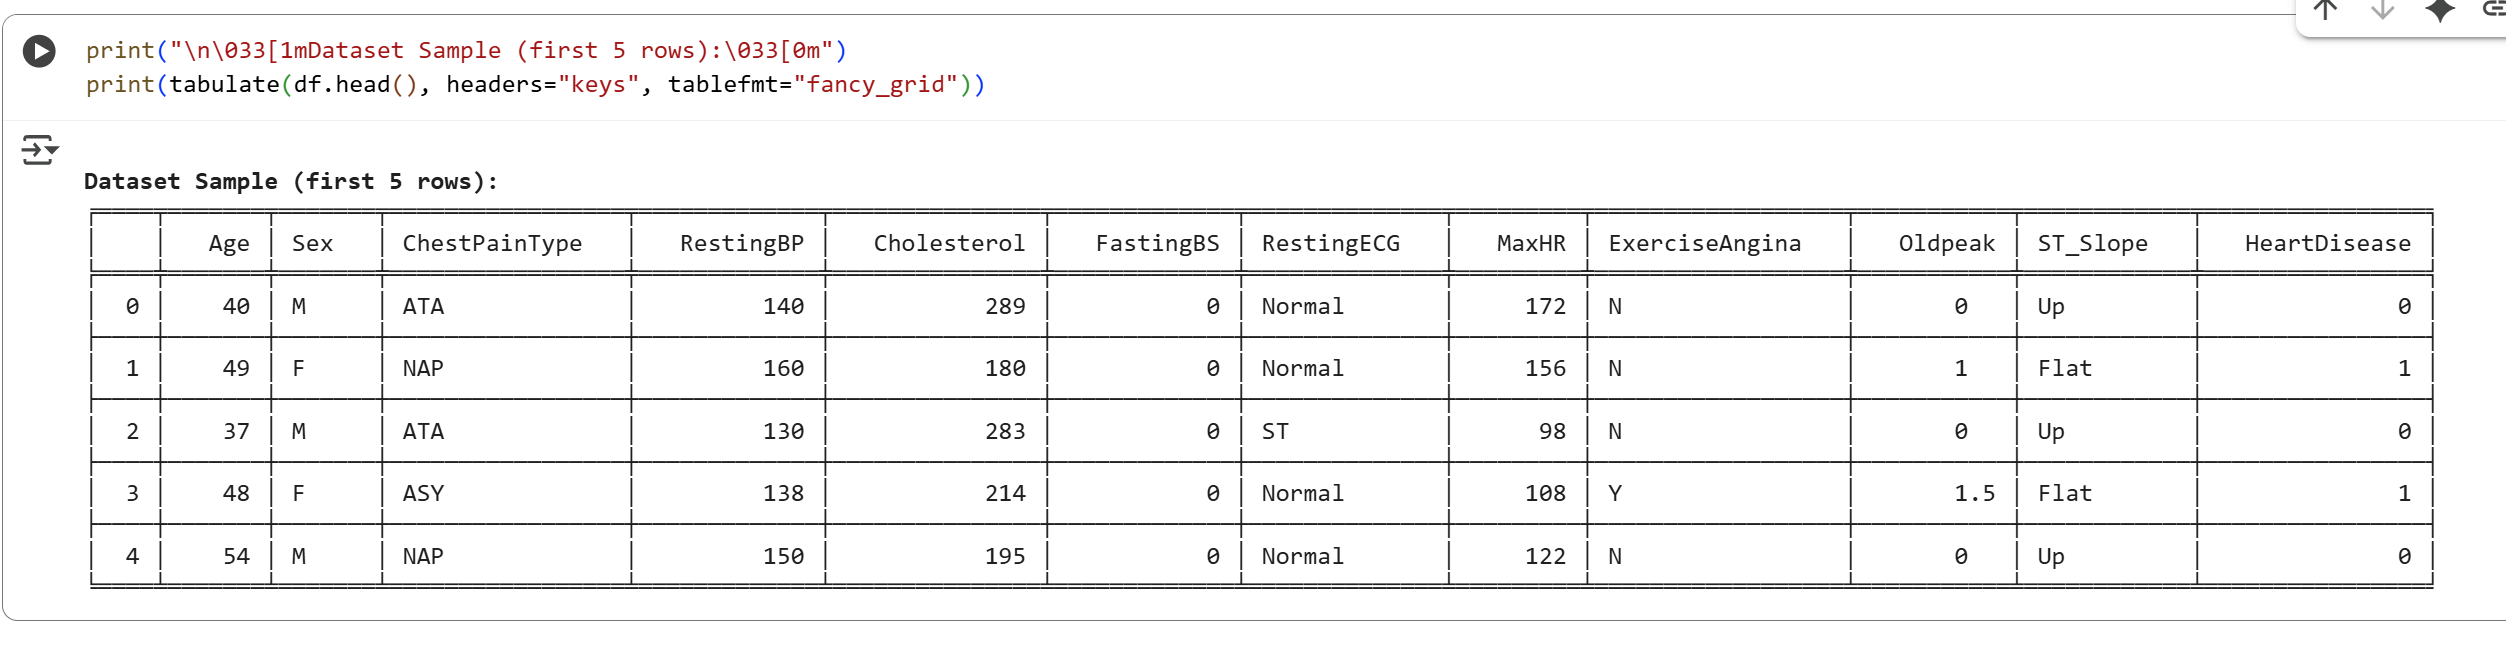

In [ ]:
from IPython.display import Image, display

display(Image("/content/dataset.png"))

# Data Set after we preprocced it:

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Finished_data.csv')


from IPython.display import display
display(df.head(10))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Overall Description:

Preprocessing Results and Dataset Comparison

After preprocessing, the heart disease dataset became much cleaner, balanced, and ready for analysis. Before preprocessing, it contained missing values, unscaled numeric features, categorical text data, outliers, and imbalanced classes, which could affect model accuracy.

Through the applied techniques, missing rows were removed, numeric values were normalized to the same scale, and categorical variables were converted into numeric form. Outliers and skewed values were corrected, while age and other features were restructured to highlight useful patterns.

Finally, feature selection using the Chi-Square Test and Correlation Coefficient kept only the most important attributes, reducing noise and improving quality. Overall, the dataset became more consistent, accurate, and suitable for reliable machine-learning analysis.